<a href="https://colab.research.google.com/github/art-python/MSDeakin/blob/SIG720-MachineLearning/SIG720_TaskP1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Part 1**
### Load data from digitData2.csv file. The last column of each file presents the label and the rest of the columns are features.
### **1. Selecting the optimum k value using Silhouette Coefficient and plot the optimum k values.**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#from google.colab import drive

# Mount your Google Drive
#drive.mount("/content/gdrive")


Mounted at /content/gdrive


In [ ]:
#url = "https://drive.google.com/file/d/1Afznf3RBMFP90grpE4Dl9mUIdxsnBKwC/view?usp=sharing"
#df = pd.read_csv(url,header=None)


In [ ]:
from google.colab import files

# Upload a single file
file = files.upload()

Saving digitData2.csv to digitData2 (1).csv


In [ ]:
# Get the filename of the uploaded file
digitData = list(file.keys())[0]

# Read the CSV file into a DataFrame
df = pd.read_csv(digitData, header=None)


In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4.0


In [ ]:
# Extract features (all columns except the last one)
features = df.iloc[:, :-1]

# Define a range of k values to try
k_values = range(2, 63)  # Adjust the range as needed

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


# Initialize lists to store the Silhouette Coefficients for each k value
silhouette_scores = []

# Iterate over each k value
for k in k_values:
    # Perform K-means clustering
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(features)

    # Calculate the Silhouette Coefficient
    score = silhouette_score(features, labels)
    silhouette_scores.append(score)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [ ]:
# Find the index of the maximum Silhouette Coefficient
optimal_k_index = silhouette_scores.index(max(silhouette_scores))

# Get the optimal k value
optimal_k = k_values[optimal_k_index]

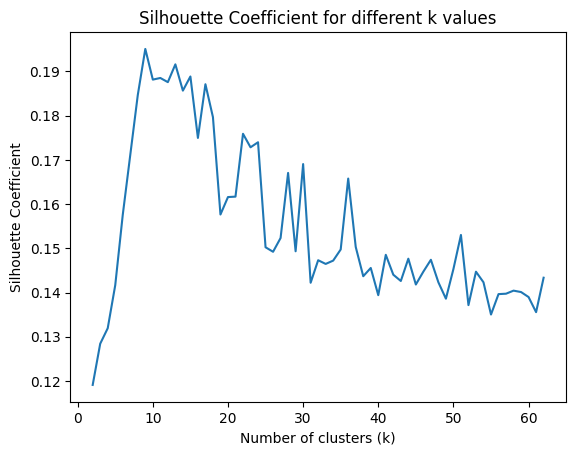

In [ ]:
# Plot the Silhouette Coefficients for each k value
plt.plot(k_values, silhouette_scores)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Coefficient')
plt.title('Silhouette Coefficient for different k values')
plt.show()

In [ ]:
# Print the optimal k value
print('Optimal k value:', optimal_k)

Optimal k value: 9


In [ ]:
from sklearn.metrics import completeness_score, homogeneity_score

# Perform K-means clustering with the optimal k value using K-means algorithm
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(features)
kmeans_labels = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# Calculate evaluation metrics
silhouette = silhouette_score(features, kmeans_labels)
inertia = kmeans.inertia_
completeness = completeness_score(df[64], kmeans_labels)
homogeneity = homogeneity_score(df[64], kmeans_labels)

print('K-means clustering performance:')
print('Silhouette Score:', silhouette)
print('Inertia:', inertia)
print('Completeness Score:', completeness)
print('Homogeneity Score:', homogeneity)

K-means clustering performance:
Silhouette Score: 0.19508955929314248
Inertia: 1004565.034670973
Completeness Score: 0.7690316784297444
Homogeneity Score: 0.7068573421136898


In [ ]:
from sklearn.metrics import confusion_matrix

# Replace true_labels and kmeans_labels with your data
true_labels = df[64]
kmeans_labels = kmeans.labels_

# Calculate the confusion matrix
conf_matrix = confusion_matrix(true_labels, kmeans_labels)

# Calculate the purity score
purity = np.sum(np.amax(conf_matrix, axis=0)) / np.sum(conf_matrix)

print('Purity Score:', purity)

Purity Score: 0.7369109947643979


In [ ]:
# Perform K-means clustering with the optimal k value using K-means++ algorithm
kmeans_pp = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
kmeans_pp.fit(features)
kmeans_pp_labels = kmeans_pp.labels_


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# Calculate evaluation metrics
silhouette_pp = silhouette_score(features, kmeans_pp_labels)
inertia_pp = kmeans_pp.inertia_
completeness_pp = completeness_score(df[64], kmeans_pp_labels)
homogeneity_pp = homogeneity_score(df[64], kmeans_pp_labels)

print('\nK-means++ clustering performance:')
print('Silhouette Score:', silhouette_pp)
print('Inertia:', inertia_pp)
print('Completeness Score:', completeness_pp)
print('Homogeneity Score:', homogeneity_pp)


K-means++ clustering performance:
Silhouette Score: 0.19508955929314248
Inertia: 1004565.034670973
Completeness Score: 0.7690316784297444
Homogeneity Score: 0.7068573421136898


In [ ]:
from sklearn.metrics import confusion_matrix

# Replace true_labels and kmeans_labels with your data
true_labels = df[64]
#kmeans_pp_labels = kmeans.labels_

# Calculate the confusion matrix
conf_matrix = confusion_matrix(true_labels, kmeans_pp_labels)

# Calculate the purity score
purity = np.sum(np.amax(conf_matrix, axis=0)) / np.sum(conf_matrix)

print('Purity Score K++:', purity)

Purity Score K++: 0.7369109947643979


### **Task 3: Repeat clustering using K-means for 50 times and report the average performance. Compare the results obtained in Q2 using K-means++ and explain the difference**

In [ ]:
# Define the number of repetitions
num_repetitions = 50

# Initialize lists to store performance metrics for each repetition
silhouette_scores = []
inertia_scores = []
completeness_scores = []
homogeneity_scores = []

for _ in range(num_repetitions):
    # Perform K-means clustering
    kmeans = KMeans(n_clusters=optimal_k, random_state=np.random.randint(100))
    kmeans.fit(features)
    kmeans_labels = kmeans.labels_

    # Calculate evaluation metrics
    silhouette = silhouette_score(features, kmeans_labels)
    inertia = kmeans.inertia_
    completeness = completeness_score(df[64], kmeans_labels)
    homogeneity = homogeneity_score(df[64], kmeans_labels)

    # Append scores to the lists
    silhouette_scores.append(silhouette)
    inertia_scores.append(inertia)
    completeness_scores.append(completeness)
    homogeneity_scores.append(homogeneity)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [ ]:
# Calculate the average performance
average_silhouette = np.mean(silhouette_scores)
average_inertia = np.mean(inertia_scores)
average_completeness = np.mean(completeness_scores)
average_homogeneity = np.mean(homogeneity_scores)

print('Average performance over', num_repetitions, 'repetitions:')
print('Average Silhouette Score:', average_silhouette)
print('Average Inertia:', average_inertia)
print('Average Completeness Score:', average_completeness)
print('Average Homogeneity Score:', average_homogeneity)


Average performance over 50 repetitions:
Average Silhouette Score: 0.1947449570073805
Average Inertia: 1005037.0950811531
Average Completeness Score: 0.7706826316610841
Average Homogeneity Score: 0.7086826784291443


### **Task 4: Apply DBSCAN on the dataset (digitData2.csv) and find the optimum "eps" and "min_samples" value. Is the number of clusters the same as the cluster found in Q2? Explain the similarity or differences that you have found between the two solutions.**

In [ ]:
from sklearn.cluster import DBSCAN

# Define a range of eps and min_samples values to try
eps_values = np.arange(0.01, 1.0, 0.01)
min_samples_values = range(2, 63)  # Adjust the range as needed

# Initialize variables to store the optimal values and the maximum Silhouette Coefficient
optimal_eps = None
optimal_min_samples = None
max_silhouette = 1

In [ ]:
# Iterate over each combination of eps and min_samples values
for eps in eps_values:
    for min_samples in min_samples_values:
        # Perform DBSCAN clustering
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(features)

        # Check if the number of clusters is greater than 1
        num_clusters = len(np.unique(labels))
        if num_clusters > 1:
            # Calculate the Silhouette Coefficient
            silhouette = silhouette_score(features, labels)

            # Update the optimal values if the Silhouette Coefficient is higher
            if silhouette > max_silhouette:
                max_silhouette = silhouette
                optimal_eps = eps
                optimal_min_samples = min_samples


In [ ]:
# Print the optimal values
print('Optimal eps:', optimal_eps)
print('Optimal min_samples:', optimal_min_samples)

Optimal eps: None
Optimal min_samples: None


In [ ]:
from sklearn.cluster import DBSCAN
X=df.iloc[:,0:-1]
y_true=df.iloc[:,-1]
model = DBSCAN(eps=0.3, min_samples=10)
y_pred=model.fit_predict(X)

from sklearn import metrics

def purity_score(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    # return purity
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix)
print(
    "purity_score: %0.3f"
    % purity_score(y_true, y_pred)
)

purity_score: 0.103


# **Part 2**
### Load "diabetes" datasets from SKlearn and do the PCA for n=3, and plot the data.
### **1. What is the variance (%) covered by the first 3 components? How is this percentage of variance computed?**

In [ ]:
from sklearn.datasets import load_diabetes

# Load the diabetes dataset
diabetes = load_diabetes()
X = diabetes.data


In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Perform PCA for n=3
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

# Compute the percentage of variance covered by the first 3 components
explained_variance_ratio = pca.explained_variance_ratio_
variance_covered = np.sum(explained_variance_ratio) * 100

print('Variance covered by the first 3 components: {:.2f}%'.format(variance_covered))

Variance covered by the first 3 components: 67.22%


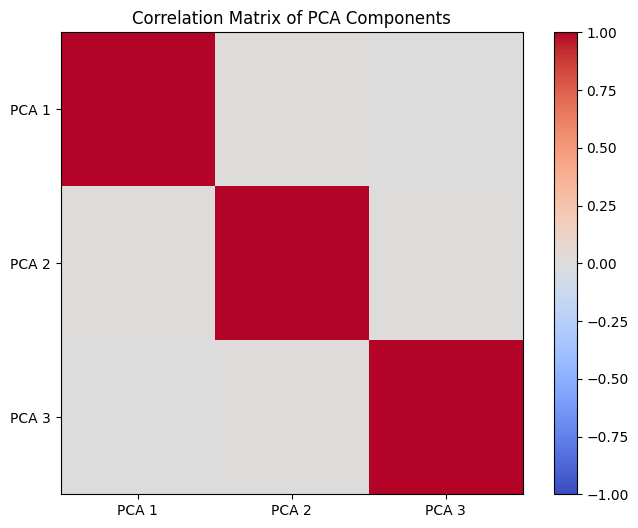

In [ ]:
# Calculate the correlation matrix of the three PCA components
correlation_matrix = np.corrcoef(X_pca.T)

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
plt.imshow(correlation_matrix, cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar()
plt.xticks(range(3), ['PCA 1', 'PCA 2', 'PCA 3'])
plt.yticks(range(3), ['PCA 1', 'PCA 2', 'PCA 3'])
plt.title('Correlation Matrix of PCA Components')
plt.show()

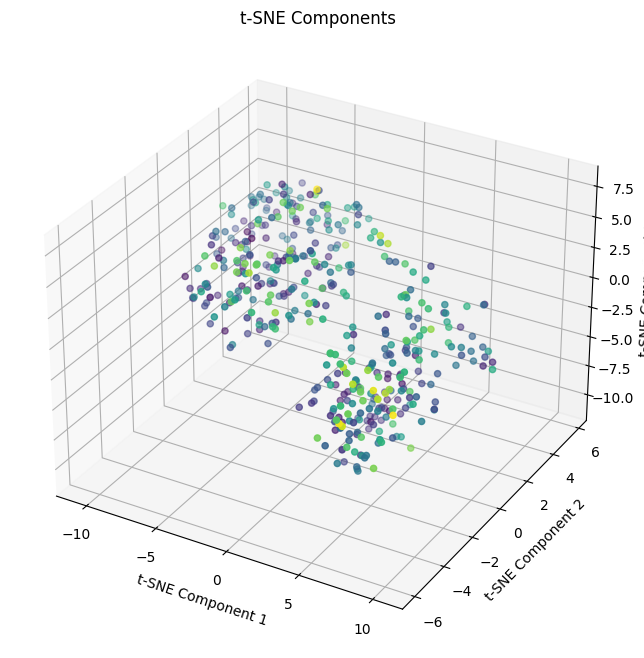

In [ ]:
# Apply t-SNE on the dataset with 3 components
tsne = TSNE(n_components=3, random_state=42)
X_tsne = tsne.fit_transform(X)

# Plot the t-SNE components
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_tsne[:, 0], X_tsne[:, 1], X_tsne[:, 2], c=diabetes.target, cmap='viridis')
ax.set_xlabel('t-SNE Component 1')
ax.set_ylabel('t-SNE Component 2')
ax.set_zlabel('t-SNE Component 3')
ax.set_title('t-SNE Components')
plt.show()